<a href="https://colab.research.google.com/github/man0045/Data-Science/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

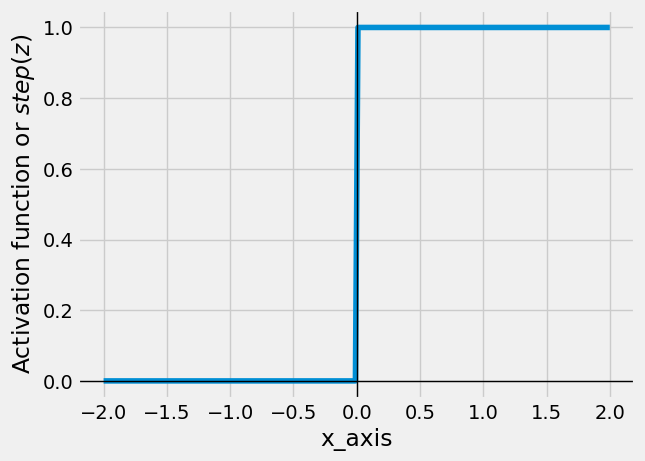

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

x_axis = np.linspace(-2, 2, 200)
step = np.where(x_axis < 0, 0, 1)

plt.plot(x_axis, step)
plt.xlabel("x_axis")
plt.ylabel(r"Activation function or $step(z)$")
plt.axhline(0, color='k', lw =1)
plt.axvline(0, color='k', lw = 1)



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

In [7]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights=np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
  def activationFunction(self, input, weights):
    z = np.dot(input, weights)
    return np.where(z>0, 1, 0)
  def fit(self, X, y):
    self.X = X
    self.y = y
    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
    print(f"X_with_bias: \n{X_with_bias}")
    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")
  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [9]:
data = {"X1": [0,0,1,1], "x2":[0,1,0,1], "y":[0,0,0,1]}
AND = pd.DataFrame(data)
AND

,X1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [10]:
X  = AND.drop("y", axis = 1)
X

,X1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [11]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [13]:
model = Perceptron(eta = 0.2, epochs = 10)
model.fit(X,y)

self.weights: [6.85483445e-05 2.80601872e-05 1.49018101e-04]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 0.20006855  0.20002806 -0.19985098]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[6.85483445e-05 2.80601872e-05 4.00149018e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.20006855 0.20002806 0.20014902]
#############

for epoch: 3
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.20006855 0.20002806 0.20014902]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.20006855 0.20002806 0.20014902]
#############

for epoch: 5
p

In [14]:
model.predict(X)

array([0, 0, 0, 1])

In [15]:
model.weights

array([0.20006855, 0.20002806, 0.20014902])

In [16]:
import os

# saving model
dir_ = "Perceptron_model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

['Perceptron_model/AND_model.model']

In [17]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


In [18]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [19]:
X = OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [20]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [21]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [ 8.04640215e-05 -1.77960817e-05  9.45054525e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 1.00008046  0.9999822  -1.49990549]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00008046  0.9999822  -0.99990549]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00008046  0.9999822  -0.49990549]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.00008046e+00 9.99982204e-01 9.45054525e-05]
#############

for epoch: 4
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.00008046e+00 9.99982204e-01 9.45054525e-05]
########

In [22]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [23]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping across column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [24]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [25]:
model = Perceptron(eta = 0.5, epochs=50)
model.fit(X,y)

self.weights: [-2.20807352e-04  9.85652798e-07  9.47038666e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.49977919  0.50000099 -0.9999053 ]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-2.20807352e-04  9.85652798e-07  9.47038666e-05]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.49977919  0.50000099 -0.9999053 ]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-2.20807352e-04  9.85652798e-07  9.47038666e-05]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.49977919  0.50000099 -0.9999053 ]
##

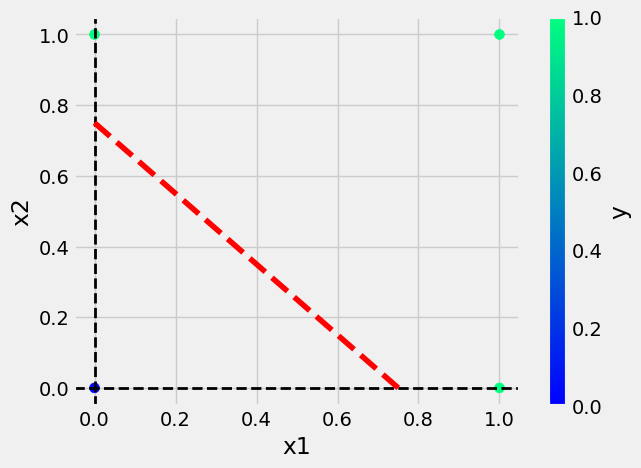

In [28]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

<Axes: xlabel='x1', ylabel='x2'>

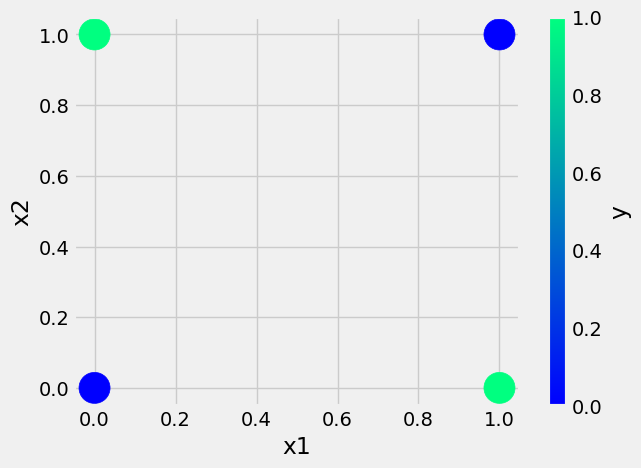

In [29]:
XOR.plot(kind = "scatter", x= "x1", y="x2", c="y", s = 500, cmap="winter")